# 1. Import the Necessary Package

In [1]:
import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Instantiate the Environment 

In [2]:
from ff_env_discrete_sparse_modified import FFEnv, Viewer  # Environemnt

env = FFEnv()
print("State size :", env.state_size)
print("Action size : ", env.action_size)

Initial ff_info :  [(35.      , 1.5707964, 0) (30.822073, 1.2396224, 0)]
State size : 7
Action size :  5


# 3. Instantiate the Agent

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=7, action_size=5, seed=0)

# 4. Train the Agent with DQN

In [4]:
def dqn(n_episodes=1000, max_t=5000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_sparse_modified.pth')
        if i_episode >= n_episodes:
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_sparse_modified.pth')
            break
            
    return scores

scores = dqn()

Episode 100	Average Score: -673.09
Episode 200	Average Score: -929.42
Episode 300	Average Score: -443.57
Episode 400	Average Score: -302.53
Episode 500	Average Score: -416.89
Episode 600	Average Score: -177.67
Episode 700	Average Score: -60.812
Episode 800	Average Score: -103.62
Episode 900	Average Score: -78.091
Episode 1000	Average Score: -69.32


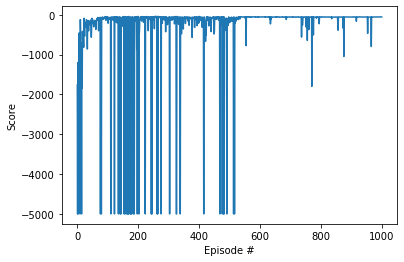

In [5]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# 5. Evaluate

In [17]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_sparse_modified.pth', map_location='cpu'))
import time
for i in range(1):
    state = env.reset()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done = env.step(action)
        time.sleep(0.04)
        if done:
            break 
path_x, path_y = env.viewer.return_path()      

#env.close()

obj_center :  276.2499948092726 118.75000333299337 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 90.00000250447816  | tr : 71.02512910334661  | dl : 35.0 | dr : 30.822073
obj_center :  277.43366074049845 117.98157829092816 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 89.42704525576248  | tr : 70.14029858693897  | dl : 35.0 | dr : 30.252533
obj_center :  283.48938605105195 137.99588516699941 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 87.039170140791  | tr : 69.56734133822329  | dl : 44.349667 | dr : 30.252533
obj_center :  284.8528918351588 138.42500016779695 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 86.5024060644872  | tr : 68.99438408950759  | dl : 44.8375 | dr : 30.252533
obj_center :  286.2180482189589 138.84383667681504 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 85.97115395084361  | tr : 68.42142684079191  | dl : 45.32332 | dr : 30.252533
obj_center :  287.58486465723024 139.25234248934885 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 85.44524987532014  | tr : 67.8484695920762

obj_center :  374.8838000516844 194.05243260343923 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 64.94531134574063  | tr : 50.463046097603744  | dl : 87.441284 | dr : 57.335506
obj_center :  372.9345639791791 195.79152954913297 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 65.51826859445632  | tr : 52.02825224780386  | dl : 87.441284 | dr : 64.29605
obj_center :  382.703073955837 207.56706733589454 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 64.65187275861855  | tr : 51.455294999088174  | dl : 93.8206 | dr : 64.29605
obj_center :  384.74256588999424 207.07546735081905 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 64.21041031180394  | tr : 50.882337750372486  | dl : 94.230316 | dr : 64.29605
obj_center :  382.66261213090047 208.91251276977982 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 64.78336756051964  | tr : 52.25642154721731  | dl : 94.230316 | dr : 70.70729
obj_center :  392.0411877619699 219.72566772221398 | goal :  {'x': 388, 'y': 228, 'w': 25}
tl : 63.993066862224964  | tr : 51.6

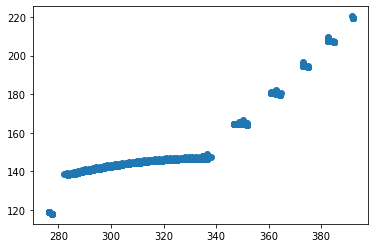

In [14]:
plt.scatter(path_x, path_y)
plt.show()